In [ ]:
pip install "numpy<2" --force-reinstall


In [ ]:
pip install -U jupyter ipykernel

In [1]:
# ======================================================
# Naive Bayes Classifier - Iris Dataset
# ======================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [2]:
# --- Load dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target



In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(iris)
df.head()

In [6]:
# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [7]:
# --- Model initialization ---
nb = GaussianNB()
nb.fit(X_train, y_train)



GaussianNB()

In [9]:
# --- Predictions ---
y_pred = nb.predict(X_test)



In [10]:
# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



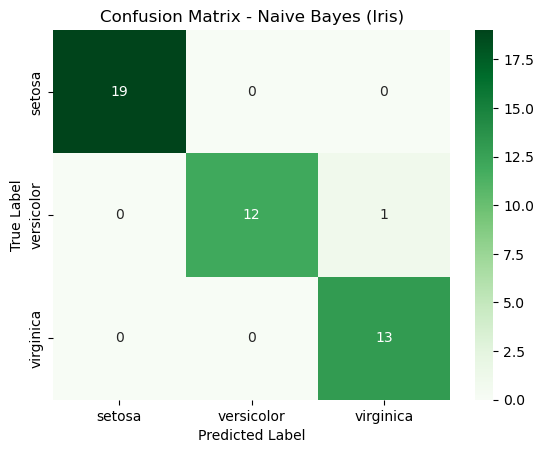

In [11]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Naive Bayes (Iris)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



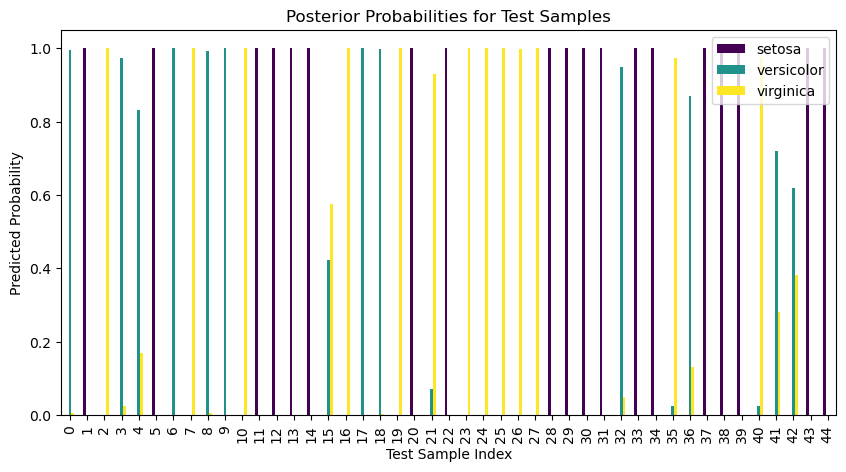

In [14]:
# --- Visualize Probabilities ---
y_proba = nb.predict_proba(X_test)
proba_df = pd.DataFrame(y_proba, columns=iris.target_names)
proba_df.plot(kind='bar', figsize=(10,5), colormap='viridis')
plt.title("Posterior Probabilities for Test Samples")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Probability")
plt.show()



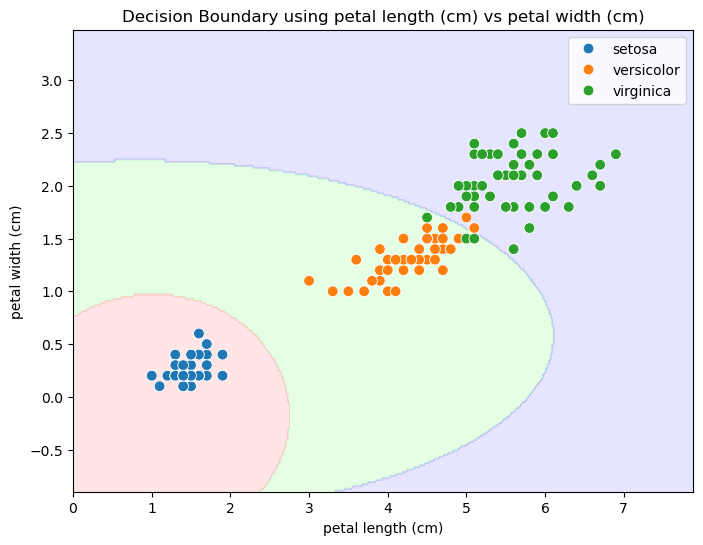

In [15]:
# --- Decision Boundary Visualization (2D Projection) ---
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, feature1, feature2):
    X_plot = X[[feature1, feature2]].values
    y_plot = y

    model.fit(X_plot, y_plot)
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]))
    sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=iris.target_names[y_plot], s=60)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Decision Boundary using {feature1} vs {feature2}")
    plt.show()

plot_decision_boundary(GaussianNB(), X, y, 'petal length (cm)', 'petal width (cm)')
